In [2]:
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [5]:
# get data file
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls() # show folders in data

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [7]:
(path/'train').ls() # show folders in train folder

(#2) [Path('train/7'),Path('train/3')]

In [8]:
# show images in folders
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [36]:
# show the first image in the three folder
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In [37]:
# show image as an array and tensor
array(im3)
tensor(im3)

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  29, 150, 195, 254, 255, 254, 176, 193, 150,  96,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,  48, 166, 224, 253, 253, 234, 196, 253, 253, 253, 253, 2

In [38]:
# show tensor as a pandas dataframe in a 28 x 28 pixel (784 pixels)
im3_t = tensor(im3)
df = pd.DataFrame(im3_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0,0,0,0,0,0,0


In [24]:
# put all tensors in a list using list comprehension
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors)

6131

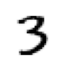

In [27]:
show_image(three_tensors[1]);

In [42]:
# stack the tensors, make them float values between 0 and 1. Combine all the images into a single 3 dimensional tensor known as rank-3 tensor.
# To take the mean later we need to cast them values into a float. When floats they must be between 0 and 1.
stacked_threes = torch.stack(three_tensors).float()/255

In [48]:
# The most important attribute is a tensors shape. We can see we have 6131 images of 28 x 28 pixels.
# The len of a tensors is known as its rank
# rank is the number of dimensions
# shape is the size of each axis of a tensor
stacked_threes.shape, len(stacked_threes.shape)

(torch.Size([6131, 28, 28]), 3)

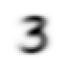

In [49]:
# finally we compute what the ideal 3 looks like. To do this we calculate the mean of all the image tensors by taking the mean along dimension 0 of our staked, 
#rank-3 tensor.
# This is the ideal 3.
mean3 = stacked_threes.mean(0)
show_image(mean3);

In [56]:
# Lets do this for the number 7 images
sevens = (path/'train'/'7').ls().sorted()
seven_tensors = [tensor(Image.open(o)) for o in sevens]
len(seven_tensors)

6265

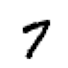

In [61]:
show_image(seven_tensors[4]);

In [63]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_sevens.shape, len(stacked_sevens.shape)

(torch.Size([6265, 28, 28]), 3)

<AxesSubplot:>

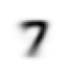

In [64]:
mean7 = stacked_sevens.mean(0)
show_image(mean7)

In [69]:
# lets now measure its distance from our "ideal digits". 
# to do this we add up the difference between this image and ideal image
# There is two main ways we do this. 
#1. Take the mean of the absolute values with positive numbers. This is called the absolute difference or L1 norm
#2. Take the mean of the square of differences and then take the square root. This is called the root mean squared error (RMSE) or L2 norm

a_3 = stacked_threes[1]
a_7 = stacked_sevens[1]
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

def L1_Norm(a,b): return (a - b).abs().mean()
def L2_Norm(a,b): return ((a - b)**2).mean().sqrt()

In [74]:
print(L1_Norm(a_3, mean3), L2_Norm(a_3, mean3))
print(L1_Norm(a_3, mean7), L2_Norm(a_3, mean7))

tensor(0.1114) tensor(0.2021)
tensor(0.1586) tensor(0.3021)


In [76]:
#Pytorch offers this as loss functions
import torch.nn.functional as F
print(F.l1_loss(a_3.float(),mean7))
print(F.mse_loss(a_3,mean7).sqrt())

tensor(0.1586)
tensor(0.3021)


In [80]:
# use lists to pass arrays
data = [[1,2,3,4],[5,6,7,8]]
npy = array(data)
tns = tensor(data)

In [84]:
tns

tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])

In [82]:
tns[1], tns[0]

(tensor([5, 6, 7, 8]), tensor([1, 2, 3, 4]))

In [85]:
tns[:,0],tns[:,1] #filter by column in the tensor

(tensor([1, 5]), tensor([2, 6]))

In [88]:
# select row and a few columns
tns[1,1:3]

tensor([6, 7])

In [92]:
tns+11 # add 11 to each number in tensor

tensor([[12, 13, 14, 15],
        [16, 17, 18, 19]])

In [95]:
tns.type()

'torch.LongTensor'

In [96]:
tns*1.5

tensor([[ 1.5000,  3.0000,  4.5000,  6.0000],
        [ 7.5000,  9.0000, 10.5000, 12.0000]])

In [111]:
vld3 = (path/'valid'/'3').ls().sorted()
vld3_tns = [tensor(Image.open(o)) for o in vld3]
stk_vld3 = torch.stack(vld3_tns).float()/255

vld7 = (path/'valid'/'7').ls().sorted()
vld7_tns = [tensor(Image.open(o)) for o in vld7]
stk_vld7 = torch.stack(vld7_tns).float()/255

stk_vld3.shape, stk_vld7.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [112]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))

In [113]:
mnist_distance(a_3, mean3)

tensor(0.1114)

In [114]:
vld3_dist = mnist_distance(stk_vld3,mean3)
vld3_dist, vld3_dist.shape

(tensor([0.1280, 0.1623, 0.1242,  ..., 0.1508, 0.1263, 0.1260]),
 torch.Size([1010]))

In [118]:
(stk_vld3-mean3).shape

torch.Size([1010, 28, 28])

In [119]:
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [120]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [121]:
is_3(stk_vld3)

tensor([ True,  True,  True,  ..., False,  True,  True])

In [123]:
accuracy_3s = is_3(stk_vld3).float().mean()
accuracy_7s = (1 - is_3(stk_vld7).float()).mean()
accuracy_3s, accuracy_7s, (accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

/home/jworkman/miniconda3/envs/fastai/lib/python3.8/site-packages/fastbook/__init__.py:73: UserWarning: Not providing a value for linspace's steps is deprecated and will throw a runtime error in a future release. This warning will appear only once per process. (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/aten/src/ATen/native/RangeFactories.cpp:23.)
  x = torch.linspace(min,max)


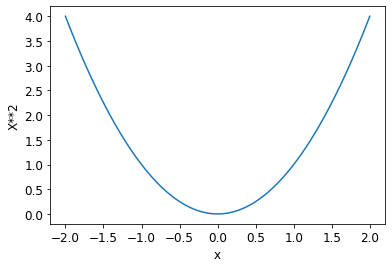

In [124]:
def f(x): return x**2
plot_function(f, 'x', 'X**2')

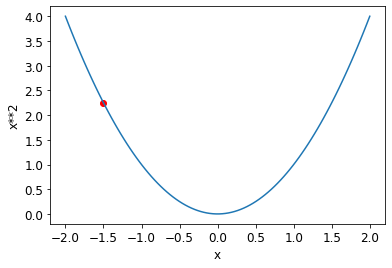

In [128]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5,f(-1.5),color='red')

In [135]:
# calculating gradients or derivitive. In deep learning gradient usually means the value of a functions derivitive at a particular argument value
xt = tensor(3.0).requires_grad_()

In [136]:
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [137]:
yt.backward()

In [138]:
xt.grad

tensor(6.)

In [139]:
xt = tensor([3.,4.,10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [140]:
def f(x): return (x**2).sum()
yt = f(xt)
yt

tensor(125., grad_fn=<SumBackward0>)

In [141]:
yt.backward()
xt.grad

tensor([ 6.,  8., 20.])

In [142]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

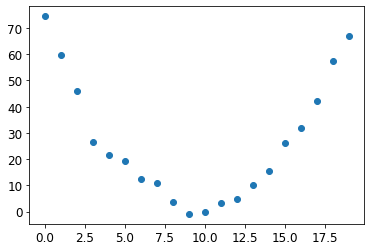

In [143]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [144]:
def f(t, params):
    a,b,c = params
    return a*(t**2) + (b*t) + c

In [145]:
def mse(preds, targets): return ((preds-targets)**2).mean().sqrt()

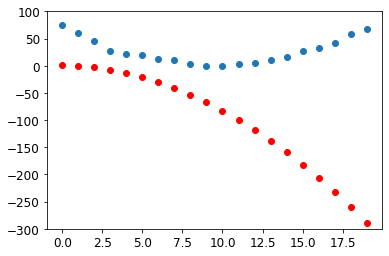

In [146]:
# Work through the seven-step process
#Step 1: initialize the parameters
params = torch.randn(3).requires_grad_()
#Step 2: calculate the predictions
preds = f(time, params)
# create a function to see how close our predictions are to our targes
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(time,speed)
    ax.scatter(time, to_np(preds), color='red')
    ax.set_ylim(-300,100)
show_preds(preds) # doesn't look right

In [147]:
#Step 3: calculate the loss
loss = mse(preds, speed)
loss

tensor(160.6979, grad_fn=<SqrtBackward>)

In [148]:
# goal is to improve
#Step 4: calculate the gradients
loss.backward()
params.grad

tensor([-165.5151,  -10.6402,   -0.7900])

In [150]:
params.grad * 1e-5

tensor([-1.6552e-03, -1.0640e-04, -7.8996e-06])

In [151]:
params

tensor([-0.7658, -0.7506,  1.3525], requires_grad=True)

In [152]:
#Step 5: step the weights
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [153]:
preds = f(time,params)
mse(preds, speed)

tensor(160.4228, grad_fn=<SqrtBackward>)

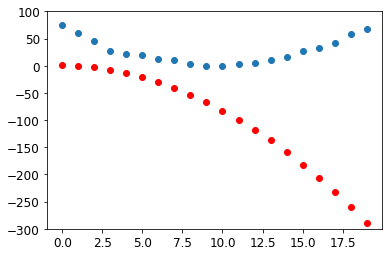

In [154]:
show_preds(preds)

In [155]:
def apply_step(params, prn=True):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [161]:
#Step 6: repeat the process
for i in range(10): apply_step(params)

122.23847198486328
121.96878814697266
121.69915771484375
121.42959594726562
121.16007995605469
120.89063262939453
120.6212387084961
120.35188293457031
120.08260345458984
119.81338500976562


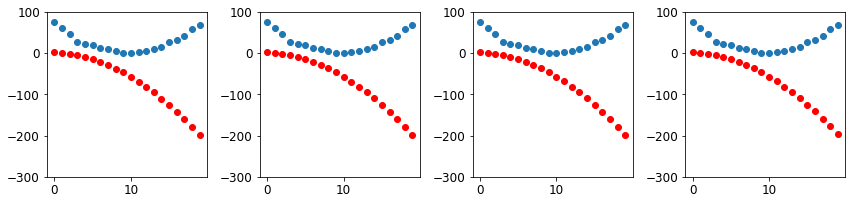

In [163]:
_,axs = plt.subplots(1,4,figsize=(12,3))
for ax in axs: show_preds(apply_step(params, False),ax)
plt.tight_layout()